# AC Price Analysis

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import re
import requests
from bs4 import BeautifulSoup

In [2]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,/;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
}

# Web Scrapping code

In [ ]:
price = []
brand = []
model = []
ton = []
star = []
inv = []
units = []
room_size = []


for i in range(1,77):
    url = ("https://www.flipkart.com/search?q=air+conditioner&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="+str(i))
    print(url)
    page = requests.get(url, headers = headers)
    soup = BeautifulSoup(page.text)
    

    a = soup.find_all("div",class_="Nx9bqj _4b5DiR")
    b = soup.find_all("div",class_="KzDlHZ")
    c = soup.find_all("li",class_="J+igdf")
    
    # Price
    for i in a:
        price.append(i.text)

    #Brand
    for i in b:
        brand.append(re.findall(r"\b^\w+",i.text)[0])

    #model
    for i in b:
        q = re.findall(r"[20]{1}[0-9]{3}",i.text)
        if len(q)>0:
            model.append(q[0])
        else:
            model.append(np.nan)

    #ton
    for i in b:
        ton.append(re.findall(r"(\d+(?:\.\d+)?)\s*Ton",i.text,flags=re.I)[0])

    #star
    for i in b:
        star.append(re.findall(r"(\d+)\s\Star",i.text)[0])
    
    #Inverter
    for i in b:
        a = re.search(r"Split Inverter",i.text,flags=re.I)
        if a:
            inv.append("Yes")
        else:
            inv.append("No")

    #units
    for i in c:
        x = re.findall(r"(\d+(?:\.\d+)?)\s*(?:Units|kWh)", i.text, flags=re.I)
        if len(x)>0:
            units.append(x[0])

    #Room_Size
    for i in c:
        x = re.findall(r"Room Size:(.*)",i.text)
        if len(x)>0:
            room_size.append(x[0])

print(len(price))
print(len(brand))
print(len(model))
print(len(ton))
print(len(star))
print(len(inv))
print(len(units))
print(len(room_size))

# Read the extracted csv file

In [2]:
df = pd.read_csv(r"C:\Users\mani9\OneDrive\Desktop\Pandas Files\Data_2 .xls")


In [3]:
df

,Unnamed: 0,Brand,Model,Capacity,Star,Inverter,Units,Size,Price
0,0,Voltas,2024.0,1.00,5,Yes,511.13,90 sqft or Below,"₹30,620"
1,1,MarQ,2025.0,0.75,3,Yes,553.16,90 sqft or Below,"₹19,490"
2,2,Midea,2025.0,1.00,3,Yes,685.62,90 sqft or Below,"₹25,990"
3,3,Voltas,2024.0,1.50,3,Yes,975.26,111 - 150 sqft,"₹28,990"
4,4,MarQ,2025.0,1.00,3,Yes,684.90,90 sqft or Below,"₹21,990"
...,...,...,...,...,...,...,...,...,...
1819,1819,LG,2025.0,1.50,5,No,744.75,111 - 150 sqft,"₹41,490"
1820,1820,realme,2025.0,1.50,5,Yes,781.88,111 - 150 sqft,"₹28,990"
1821,1821,Godrej,2025.0,1.50,5,Yes,728.31,111 - 150 sqft,"₹33,990"
1822,1822,IFB,2025.0,2.00,3,Yes,1252.53,151 - 200 sqft,"₹40,590"


In [4]:
df = df.drop("Unnamed: 0",axis =1)

In [5]:
df = df.rename(columns = {"Capacity" : "Capacity in tons","Size" : "Room size","Units":"Power usage per annualy"})

In [6]:
df

,Brand,Model,Capacity in tons,Star,Inverter,Power usage per annualy,Room size,Price
0,Voltas,2024.0,1.00,5,Yes,511.13,90 sqft or Below,"₹30,620"
1,MarQ,2025.0,0.75,3,Yes,553.16,90 sqft or Below,"₹19,490"
2,Midea,2025.0,1.00,3,Yes,685.62,90 sqft or Below,"₹25,990"
3,Voltas,2024.0,1.50,3,Yes,975.26,111 - 150 sqft,"₹28,990"
4,MarQ,2025.0,1.00,3,Yes,684.90,90 sqft or Below,"₹21,990"
...,...,...,...,...,...,...,...,...
1819,LG,2025.0,1.50,5,No,744.75,111 - 150 sqft,"₹41,490"
1820,realme,2025.0,1.50,5,Yes,781.88,111 - 150 sqft,"₹28,990"
1821,Godrej,2025.0,1.50,5,Yes,728.31,111 - 150 sqft,"₹33,990"
1822,IFB,2025.0,2.00,3,Yes,1252.53,151 - 200 sqft,"₹40,590"


# To get the information about the dataset

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    1824 non-null   object 
 1   Model                    1596 non-null   float64
 2   Capacity in tons         1824 non-null   float64
 3   Star                     1824 non-null   int64  
 4   Inverter                 1824 non-null   object 
 5   Power usage per annualy  1824 non-null   float64
 6   Room size                1824 non-null   object 
 7   Price                    1824 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 114.1+ KB


### Observation :-
- It will gives the all information about the dataset.Here brand, inverter, room size, price are the categorical data type and remaining are the numerical data types

## To get all column names

In [121]:
df.columns

Index(['Brand', 'Model', 'Capacity in tons', 'Star', 'Inverter',
       'Power usage per annualy', 'Room size', 'Price'],
      dtype='object')

### Observation :-
- To find all the column names present in the dataset, we can use the columns attribute. It returns all the column names.

# To get the all unique values in the categorical columns

## Brand

In [122]:
df["Brand"].unique()

array(['Voltas', 'MarQ', 'Midea', 'Lloyd', 'Samsung', 'Blue', 'Panasonic',
       'Daikin', 'Godrej', 'LG', 'realme', 'IFB'], dtype=object)

In [123]:
df["Brand"].nunique()

12

In [124]:
df["Brand"].value_counts()

Brand
Voltas       304
MarQ         304
Samsung      304
Panasonic    152
Godrej       152
IFB          152
Midea         76
Lloyd         76
Blue          76
Daikin        76
LG            76
realme        76
Name: count, dtype: int64

## Invertor or not

In [125]:
df["Inverter"].unique()

array(['Yes', 'No'], dtype=object)

In [126]:
df["Inverter"].nunique()

2

In [127]:
df["Inverter"].value_counts()

Inverter
Yes    1748
No       76
Name: count, dtype: int64

## Room size

In [128]:
df['Room size'].unique()

array([' 90 sqft or Below', ' 111 - 150 sqft', ' 151 - 200 sqft'],
      dtype=object)

In [129]:
df['Room size'].nunique()

3

In [130]:
df['Room size'].value_counts()

Room size
111 - 150 sqft      1140
90 sqft or Below     456
151 - 200 sqft       228
Name: count, dtype: int64

### Observation :-
- By using the unique, nunique and value_counts attributes we can get the following information:
- 1.unique :- It will returns what are the unique values present in the column
- 2.nunique :- It will returns how many unique value present in the column
- 3.Value_counts :- It will gives the how many values are present in each unique value

# Data Cleaning

## Type converstion

## Here the price will be in object convert it into int

In [7]:
df["Price"] = [i.replace(",","").replace("₹","")  for i in df["Price"]]  


In [8]:
df["Price"] = df["Price"].astype("int")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    1824 non-null   object 
 1   Model                    1596 non-null   float64
 2   Capacity in tons         1824 non-null   float64
 3   Star                     1824 non-null   int64  
 4   Inverter                 1824 non-null   object 
 5   Power usage per annualy  1824 non-null   float64
 6   Room size                1824 non-null   object 
 7   Price                    1824 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 107.0+ KB


In [134]:
df

,Brand,Model,Capacity in tons,Star,Inverter,Power usage per annualy,Room size,Price
0,Voltas,2024.0,1.00,5,Yes,511.13,90 sqft or Below,30620
1,MarQ,2025.0,0.75,3,Yes,553.16,90 sqft or Below,19490
2,Midea,2025.0,1.00,3,Yes,685.62,90 sqft or Below,25990
3,Voltas,2024.0,1.50,3,Yes,975.26,111 - 150 sqft,28990
4,MarQ,2025.0,1.00,3,Yes,684.90,90 sqft or Below,21990
...,...,...,...,...,...,...,...,...
1819,LG,2025.0,1.50,5,No,744.75,111 - 150 sqft,41490
1820,realme,2025.0,1.50,5,Yes,781.88,111 - 150 sqft,28990
1821,Godrej,2025.0,1.50,5,Yes,728.31,111 - 150 sqft,33990
1822,IFB,2025.0,2.00,3,Yes,1252.53,151 - 200 sqft,40590


## Missing value treatment

### To find the missing values :-

In [10]:
df.isnull().sum() 

Brand                        0
Model                      228
Capacity in tons             0
Star                         0
Inverter                     0
Power usage per annualy      0
Room size                    0
Price                        0
dtype: int64

### percentage og missing values

In [11]:
df.isnull().sum()/len(df)*100

Brand                       0.0
Model                      12.5
Capacity in tons            0.0
Star                        0.0
Inverter                    0.0
Power usage per annualy     0.0
Room size                   0.0
Price                       0.0
dtype: float64

### Observation :-
- Here we can use isnull() and sum() attributes for finding the how many missing values present in the each column
- In Model column there is 228 missing value and there no missing values in the dataset

### Replacing the missing values with accurate data :-

In [12]:
df["Model"].fillna(df["Model"].mode()[0],inplace=True)

C:\Users\mani9\AppData\Local\Temp\ipykernel_30652\990536589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Model"].fillna(df["Model"].mode()[0],inplace=True)


In [13]:
df.isnull().sum()

Brand                      0
Model                      0
Capacity in tons           0
Star                       0
Inverter                   0
Power usage per annualy    0
Room size                  0
Price                      0
dtype: int64

### Observation :-
- Here the model column is discrete datatype. so, we can replace the missing value with mode.

## Outliers 

### There is no outliers in the data

# Duplicate rows treatment

In [14]:
df[df.duplicated()].shape[0]

1800

### Observation :-
- The dataset reports 1800 duplicates, but in reality, there are no duplicate rows.

## Adding columns for better analysis

### 1.Price tag

In [15]:
def pr_tag(x):
    if x < 20000:
        return "Low price"
    elif x < 30000:
        return "Moderate price"
    else:
        return "High price"

In [16]:
df["Price tag"] = df["Price"].apply(pr_tag)

In [18]:

df1 = pd.read_csv(r"C:\Users\mani9\OneDrive\Documents\AC_cleaned_surya.xls")
ai = []
for i in df1["AI"]:
    ai.append(i)
df["AI"] = ai

df = df[['Brand', 'Model', 'Capacity in tons', 'Star', 'Inverter',
       'Power usage per annualy', 'Room size', 'AI',"Price tag","Price"]]

In [19]:
df

,Brand,Model,Capacity in tons,Star,Inverter,Power usage per annualy,Room size,AI,Price tag,Price
0,Voltas,2024.0,1.00,5,Yes,511.13,90 sqft or Below,No,High price,30620
1,MarQ,2025.0,0.75,3,Yes,553.16,90 sqft or Below,No,Low price,19490
2,Midea,2025.0,1.00,3,Yes,685.62,90 sqft or Below,Yes,Moderate price,25990
3,Voltas,2024.0,1.50,3,Yes,975.26,111 - 150 sqft,No,Moderate price,28990
4,MarQ,2025.0,1.00,3,Yes,684.90,90 sqft or Below,No,Moderate price,21990
...,...,...,...,...,...,...,...,...,...,...
1819,LG,2025.0,1.50,5,No,744.75,111 - 150 sqft,Yes,High price,41490
1820,realme,2025.0,1.50,5,Yes,781.88,111 - 150 sqft,No,Moderate price,28990
1821,Godrej,2025.0,1.50,5,Yes,728.31,111 - 150 sqft,No,High price,33990
1822,IFB,2025.0,2.00,3,Yes,1252.53,151 - 200 sqft,Yes,High price,40590


In [ ]:
df.to_excel(r"C:\Users\mani9\OneDrive\Desktop\Pandas Files\")

# Descriptive analysis :-

## 1.For numerical data 

In [86]:
df.describe(exclude="object")

,Model,Capacity in tons,Star,Power usage per annualy,Price
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000
mean,2024.791667,1.427083,3.833333,831.204167,32599.583333
std,0.406228,0.318606,0.986284,203.125218,6236.018960
min,2024.000000,0.750000,3.000000,511.130000,19490.000000
25%,2025.000000,1.375000,3.000000,712.185000,28990.000000
50%,2025.000000,1.500000,3.000000,781.880000,32490.000000
75%,2025.000000,1.500000,5.000000,964.692500,36990.000000
max,2025.000000,2.000000,5.000000,1252.530000,42390.000000


## 2.For categorical data 

In [87]:
df.describe(include="object")

,Brand,Inverter,Room size,AI,Price tag
count,1824,1824,1824,1824,1824
unique,12,2,3,2,3
top,Voltas,Yes,111 - 150 sqft,No,High price
freq,304,1748,1140,1216,1064


# Non - Visualization  Analysis

# C vs C

## 1.Count of Inverter and Non-Inverter ACs by Brand

In [88]:
pd.crosstab(df["Brand"],df["Inverter"])

Inverter,No,Yes
Brand,,
Blue,0,76
Daikin,0,76
Godrej,0,152
IFB,0,152
LG,76,0
Lloyd,0,76
MarQ,0,304
Midea,0,76
Panasonic,0,152


## 2.AC Models by Brand and Room Size

In [35]:
pd.crosstab(df["Brand"],df["Room size"])

Room size,111 - 150 sqft,151 - 200 sqft,90 sqft or Below
Brand,,,
Blue,76,0,0
Daikin,76,0,0
Godrej,152,0,0
IFB,76,76,0
LG,76,0,0
Lloyd,76,0,0
MarQ,152,0,152
Midea,0,0,76
Panasonic,76,76,0


## 3.Count of AC Models per Brand by Price

In [36]:
pd.crosstab(df["Brand"],df["Price tag"])

Price tag,High price,Low price,Moderate price
Brand,,,
Blue,76,0,0
Daikin,76,0,0
Godrej,76,0,76
IFB,152,0,0
LG,76,0,0
Lloyd,0,0,76
MarQ,0,76,228
Midea,0,0,76
Panasonic,152,0,0


# 4.count on Ac's with AI

In [37]:
pd.crosstab(df["Brand"],df["AI"])

AI,No,Yes
Brand,,
Blue,76,0
Daikin,76,0
Godrej,152,0
IFB,0,152
LG,0,76
Lloyd,76,0
MarQ,304,0
Midea,0,76
Panasonic,76,76


In [38]:
pd.crosstab(df["Room size"],df["Price tag"])

Price tag,High price,Low price,Moderate price
Room size,,,
111 - 150 sqft,684,0,456
151 - 200 sqft,228,0,0
90 sqft or Below,152,76,228


# C vs N

## 1.Average price of each brand

In [39]:
df.groupby("Brand")["Price"].mean()

Brand
Blue         39990.0
Daikin       34490.0
Godrej       30990.0
IFB          37590.0
LG           41490.0
Lloyd        29490.0
MarQ         23865.0
Midea        25990.0
Panasonic    37940.0
Samsung      34365.0
Voltas       33997.5
realme       28990.0
Name: Price, dtype: float64

## 2.Average power usage per annualy for each brand

In [40]:
df.groupby("Brand")["Power usage per annualy"].mean()

Brand
Blue          783.3300
Daikin        966.4700
Godrej        840.1100
IFB           986.7850
LG            744.7500
Lloyd         941.7600
MarQ          746.0100
Midea         685.6200
Panasonic    1096.3750
Samsung       689.0625
Voltas        864.5650
realme        781.8800
Name: Power usage per annualy, dtype: float64

## 3.Average power usage based on price tag

In [41]:
df.groupby("Price tag")["Power usage per annualy"].mean()

Price tag
High price        857.272143
Low price         553.160000
Moderate price    821.547778
Name: Power usage per annualy, dtype: float64

## 4.Average price based on stars

In [42]:
df.groupby("Star")["Price"].mean()

Star
3    30775.714286
5    35153.000000
Name: Price, dtype: float64

## 5.Average power usage based on stars

In [43]:
df.groupby("Star")["Power usage per annualy"].mean()

Star
3    919.152857
5    708.076000
Name: Power usage per annualy, dtype: float64

## 6.Average price if it inverter 

In [44]:
df.groupby("Inverter")["Price"].mean()

Inverter
No     41490.000000
Yes    32213.043478
Name: Price, dtype: float64

## 7.Room side based on average price

In [45]:
df.groupby("Room size")["Price"].mean()

Room size
111 - 150 sqft      33056.666667
151 - 200 sqft      41156.666667
90 sqft or Below    27178.333333
Name: Price, dtype: float64

## 8.Average capcity of tons based on price tag

In [46]:
df.groupby("Price tag")["Capacity in tons"].mean()

Price tag
High price        1.535714
Low price         0.750000
Moderate price    1.333333
Name: Capacity in tons, dtype: float64

## 9. 3-star and 5-star ACs are available for each room size.

In [47]:
pd.crosstab(df["Brand"],[df["Room size"],df["Star"]])

Room size 111 - 150 sqft     151 - 200 sqft 90 sqft or Below    
Star                   3   5              3                3   5
Brand                                                           
Blue                   0  76              0                0   0
Daikin                76   0              0                0   0
Godrej                76  76              0                0   0
IFB                    0  76             76                0   0
LG                     0  76              0                0   0
Lloyd                 76   0              0                0   0
MarQ                  76  76              0              152   0
Midea                  0   0              0               76   0
Panasonic             76   0             76                0   0
Samsung               76  76              0               76  76
Voltas                76  76             76                0  76
realme                 0  76              0                0   0

## 10. Min, Max and average price of each brand

In [48]:
df.pivot_table(values='Price',index='Brand',aggfunc=['min','mean','max'])

,min,mean,max
,Price,Price,Price
Brand,,,
Blue,39990,39990.0,39990
Daikin,34490,34490.0,34490
Godrej,27990,30990.0,33990
IFB,34590,37590.0,40590
LG,41490,41490.0,41490
Lloyd,29490,29490.0,29490
MarQ,19490,23865.0,28990
Midea,25990,25990.0,25990


# 11.Room size vs Capacity in tons

In [49]:
df.groupby("Room size")["Capacity in tons"].mean()

Room size
111 - 150 sqft      1.500000
151 - 200 sqft      2.000000
90 sqft or Below    0.958333
Name: Capacity in tons, dtype: float64

# N vs N

## 1.Average, min and max capacity in tons based on model

In [50]:
df.pivot_table(values='Capacity in tons',index='Model',aggfunc=['mean','min','max'])

,mean,min,max
,Capacity in tons,Capacity in tons,Capacity in tons
Model,,,
2024.0,1.500000,1.00,2.0
2025.0,1.407895,0.75,2.0


## 2.Average, min and max capacity in tons based on stars

In [51]:
df.pivot_table(values='Capacity in tons',index='Star',aggfunc=['mean','min','max'])

,mean,min,max
,Capacity in tons,Capacity in tons,Capacity in tons
Star,,,
3,1.446429,0.75,2.0
5,1.400000,1.00,1.5


In [52]:
df.pivot_table(values='Power usage per annualy',index='Star',aggfunc=['mean'])

,mean
,Power usage per annualy
Star,
3,919.152857
5,708.076000


In [53]:
df.pivot_table(values='Power usage per annualy',index='Price',aggfunc=['mean'])

,mean
,Power usage per annualy
Price,
19490,553.16
21990,684.90
24990,964.10
25990,685.62
27990,951.91
28990,791.41
29490,941.76
30620,511.13


In [54]:
pd.crosstab(df["Star"], df["Inverter"], normalize='index') * 100


Inverter,No,Yes
Star,,
3,0.0,100.0
5,10.0,90.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    1824 non-null   object 
 1   Model                    1824 non-null   float64
 2   Capacity in tons         1824 non-null   float64
 3   Star                     1824 non-null   int64  
 4   Inverter                 1824 non-null   object 
 5   Power usage per annualy  1824 non-null   float64
 6   Room size                1824 non-null   object 
 7   AI                       1824 non-null   object 
 8   Price tag                1824 non-null   object 
 9   Price                    1824 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 135.5+ KB


# Multivariate analysis

## Average price based on model and brand 

In [56]:
df.pivot_table(values='Price',index='Brand',columns="Model",aggfunc=['mean',min,max])

C:\Users\mani9\AppData\Local\Temp\ipykernel_17016\2214979860.py:1: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.pivot_table(values='Price',index='Brand',columns="Model",aggfunc=['mean',min,max])
C:\Users\mani9\AppData\Local\Temp\ipykernel_17016\2214979860.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.pivot_table(values='Price',index='Brand',columns="Model",aggfunc=['mean',min,max])


mean               min               max         
Model            2024.0   2025.0   2024.0   2025.0   2024.0   2025.0
Brand                                                               
Blue                NaN  39990.0      NaN  39990.0      NaN  39990.0
Daikin     34490.000000      NaN  34490.0      NaN  34490.0      NaN
Godrej              NaN  30990.0      NaN  27990.0      NaN  33990.0
IFB                 NaN  37590.0      NaN  34590.0      NaN  40590.0
LG                  NaN  41490.0      NaN  41490.0      NaN  41490.0
Lloyd               NaN  29490.0      NaN  29490.0      NaN  29490.0
MarQ                NaN  23865.0      NaN  19490.0      NaN  28990.0
Midea               NaN  25990.0      NaN  25990.0      NaN  25990.0
Panasonic  42390.000000  33490.0  42390.0  33490.0  42390.0  33490.0
Samsung             NaN  34365.0      NaN  28990.0      NaN  40990.0
Voltas     31833.333333  40490.0  28990.0  40490.0  35890.0  40490.0
realme              NaN  28990.0      NaN  28990.0      NaN  28990.0

## Average power usage based on stars and room size 

In [57]:
df.pivot_table(values='Power usage per annualy',index='Room size',columns="Star",aggfunc=['mean',min,max])

C:\Users\mani9\AppData\Local\Temp\ipykernel_17016\1167603213.py:1: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.pivot_table(values='Power usage per annualy',index='Room size',columns="Star",aggfunc=['mean',min,max])
C:\Users\mani9\AppData\Local\Temp\ipykernel_17016\1167603213.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.pivot_table(values='Power usage per annualy',index='Room size',columns="Star",aggfunc=['mean',min,max])


mean                 min              max        
Star                        3          5        3       5        3       5
Room size                                                                 
111 - 150 sqft     947.018571  755.46375   852.47  721.04   977.16  783.33
151 - 200 sqft    1229.570000        NaN  1215.59     NaN  1252.53     NaN
90 sqft or Below   637.575000  518.52500   553.16  511.13   685.62  525.92

## Average price based on capacity and AI features

In [58]:
df.pivot_table(values='Price',index='Capacity in tons',columns="AI",aggfunc=['mean'])

mean         
AI                          No      Yes
Capacity in tons                       
0.75              19490.000000      NaN
1.00              27200.000000  30990.0
1.50              31571.818182  37140.0
2.00              40490.000000  41490.0

### Observation :-
- Here we can done the all non-visualization analysis of the data set.

# Visualization analysis

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Uni-Variate analysis

## 1.Brand column

C:\Users\mani9\AppData\Local\Temp\ipykernel_17016\4170776918.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Brand', data=df, palette='pastel', edgecolor='black')


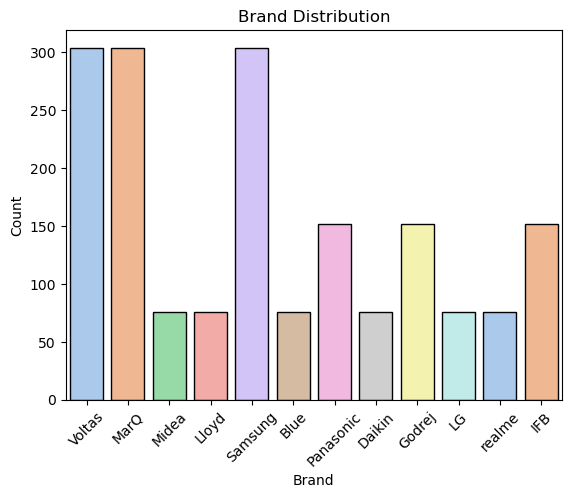

In [60]:

sns.countplot(x='Brand', data=df, palette='pastel', edgecolor='black')
plt.title("Brand Distribution")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

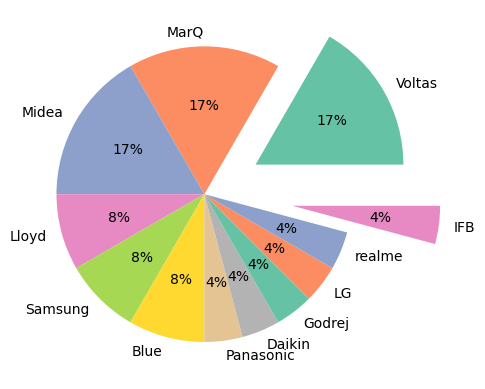

In [61]:
colours = sns.color_palette('Set2')
plt.pie(df['Brand'].value_counts(),autopct = '%.0f%%',
       explode = [0.4,0,0,0,0,0,0,0,0,0,0,0.6],colors = colours,
       labels=df['Brand'].unique())
plt.show()

## 2.Inverter column

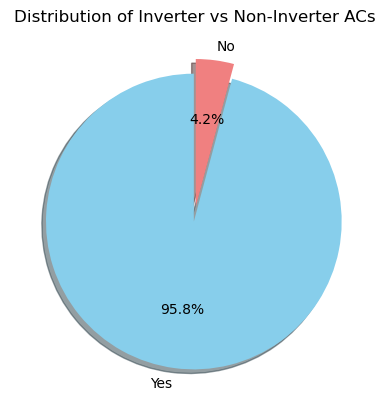

In [62]:


df["Inverter"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',       # show percentage with one decimal
    colors=['skyblue', 'lightcoral'],  # optional colors
    startangle=90,            # rotate the start angle
    shadow=True,              # adds a soft shadow
    explode=(0.05, 0.05)      # slightly separate slices
)

plt.title("Distribution of Inverter vs Non-Inverter ACs")
plt.ylabel("")  # removes the 'Inverter' label on the left
plt.show()


## 3.Room size 

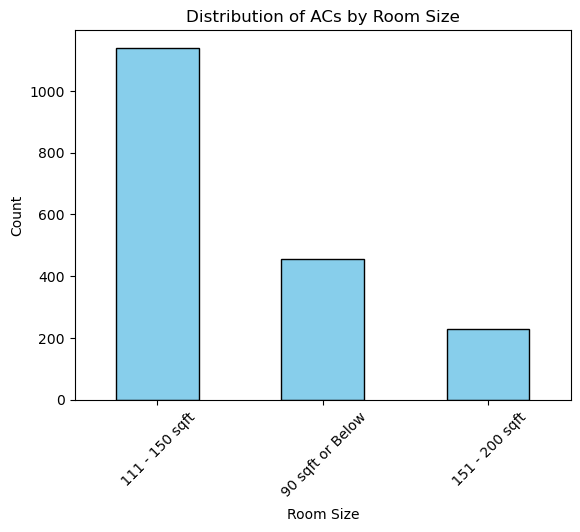

In [63]:
df["Room size"].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of ACs by Room Size")
plt.xlabel("Room Size")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## 4.Price tag

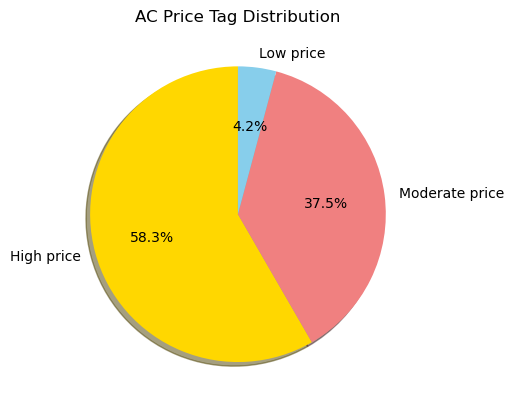

In [64]:
df["Price tag"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['gold', 'lightcoral', 'skyblue', 'lightgreen'],
    startangle=90,
    shadow=True
)

plt.title("AC Price Tag Distribution")
plt.ylabel("")  # removes extra label
plt.show()


## 4.Model

C:\Users\mani9\AppData\Local\Temp\ipykernel_17016\4066152039.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


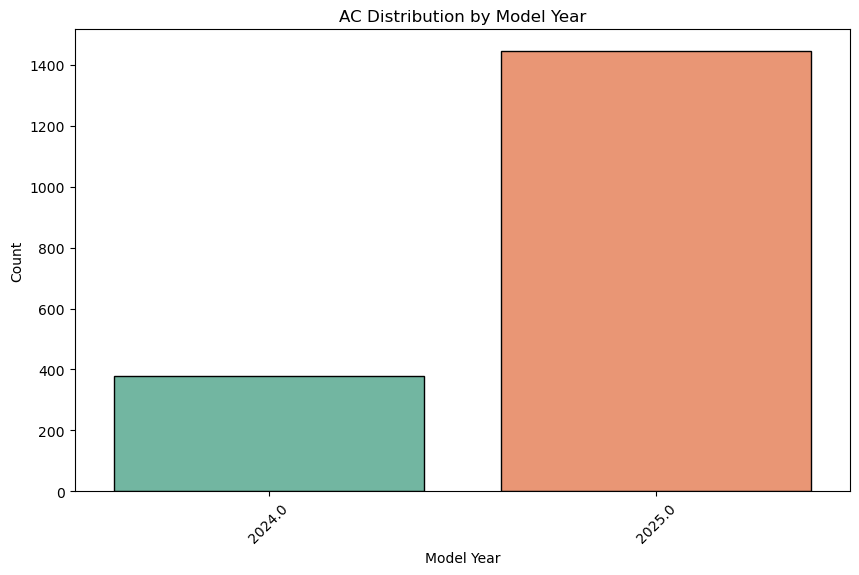

In [65]:
model_counts = df["Model"].value_counts().sort_index()

# Convert to DataFrame for seaborn
model_df = model_counts.reset_index()
model_df.columns = ["Model Year", "Count"]

# Seaborn bar plot with Set2 palette
plt.figure(figsize=(10,6))
sns.barplot(
    data=model_df, 
    x="Model Year", 
    y="Count", 
    palette="Set2",  # Use Set2 color palette
    edgecolor='black'
)

plt.title("AC Distribution by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

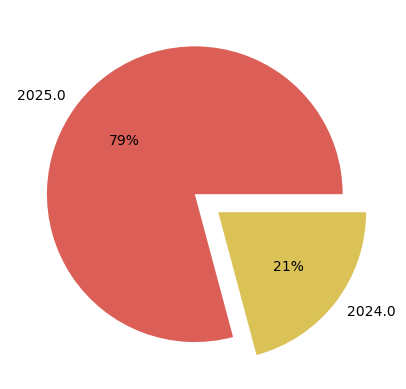

In [66]:
colours = sns.color_palette('hls',8)
plt.pie(df['Model'].value_counts(),autopct = '%.0f%%',
       explode = [0,0.2],colors = colours,
       labels=df['Model'].value_counts().index)
plt.show()

## 5.Price

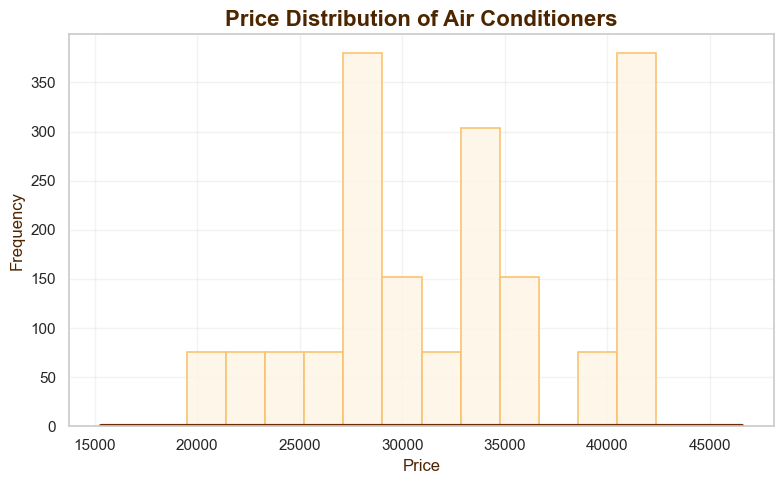

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")

# Champagne gold tones
bar_color = "#FEF5E7"     # light champagne bars
edge_color = "#F8C471"    # soft golden border
kde_color = "#6E2C00"     # dark bronze KDE line

# --- Histogram ---
sns.histplot(
    df["Price"],
    bins=12,
    color=bar_color,
    edgecolor=edge_color,
    alpha=0.9,
    linewidth=1.2
)

# --- KDE Line (dark, premium) ---
sns.kdeplot(
    df["Price"],
    color=kde_color,
    linewidth=3,
    fill=False,       # make sure only line shows
    alpha=1
)

# --- Labels & Titles ---
plt.title("Price Distribution of Air Conditioners", fontsize=16, fontweight="bold", color="#4D2600")
plt.xlabel("Price", fontsize=12, color="#4D2600")
plt.ylabel("Frequency", fontsize=12, color="#4D2600")

# --- Style Tweaks ---
plt.grid(alpha=0.25)
plt.tight_layout()

plt.show()


## 6.Capacity in tons

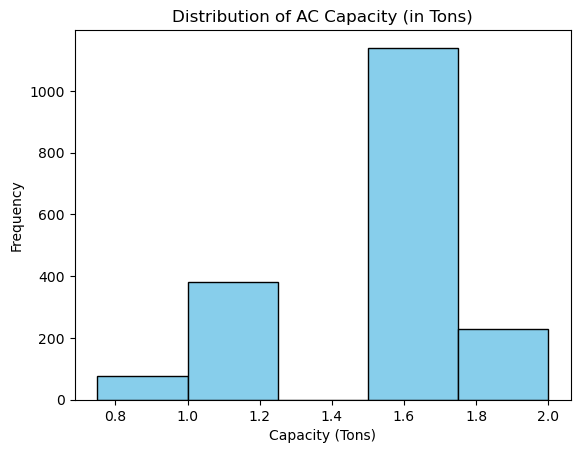

In [68]:
plt.hist(df["Capacity in tons"], bins=5, color='skyblue', edgecolor='black')
plt.title("Distribution of AC Capacity (in Tons)")
plt.xlabel("Capacity (Tons)")
plt.ylabel("Frequency")
plt.show()

## 7.Power usage per annualy

C:\Users\mani9\AppData\Local\Temp\ipykernel_6956\2640266619.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




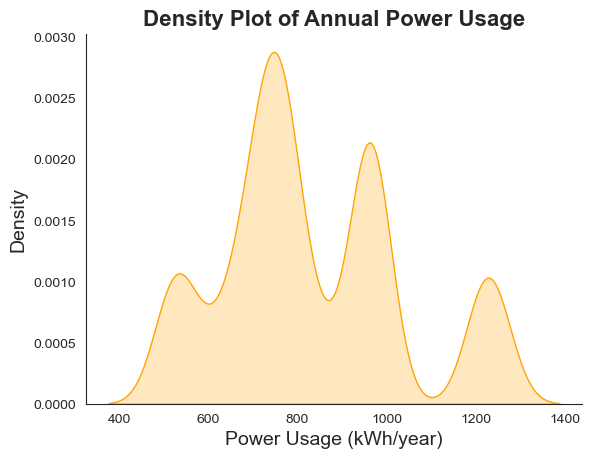

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")  # removes grid lines
sns.kdeplot(df["Power usage per annualy"], shade=True, color='orange')
plt.title("Density Plot of Annual Power Usage", fontsize=16, weight='bold')
plt.xlabel("Power Usage (kWh/year)", fontsize=14)
plt.ylabel("Density", fontsize=14)
sns.despine()
plt.show()


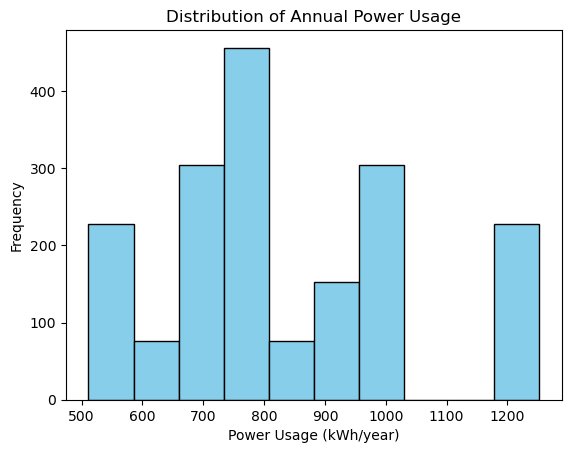

In [64]:
import matplotlib.pyplot as plt

plt.hist(df["Power usage per annualy"], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Annual Power Usage")
plt.xlabel("Power Usage (kWh/year)")
plt.ylabel("Frequency")
plt.show()


## 8.Star column

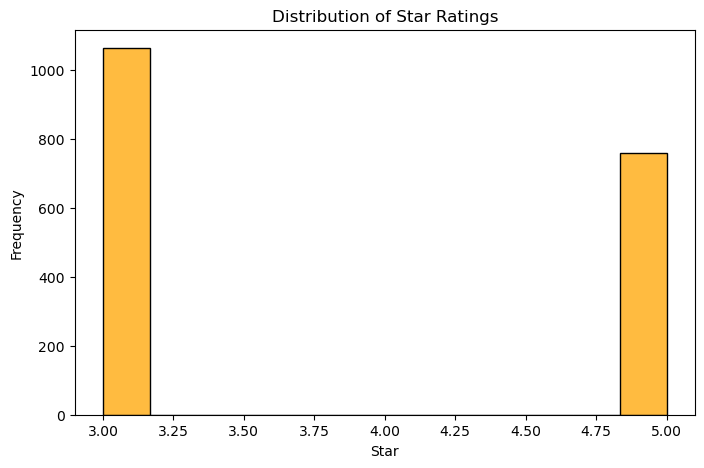

In [65]:
plt.figure(figsize=(8,5))
sns.histplot(df["Star"], color='orange')
plt.title("Distribution of Star Ratings")
plt.xlabel("Star")
plt.ylabel("Frequency")
plt.show()

## 9.AI

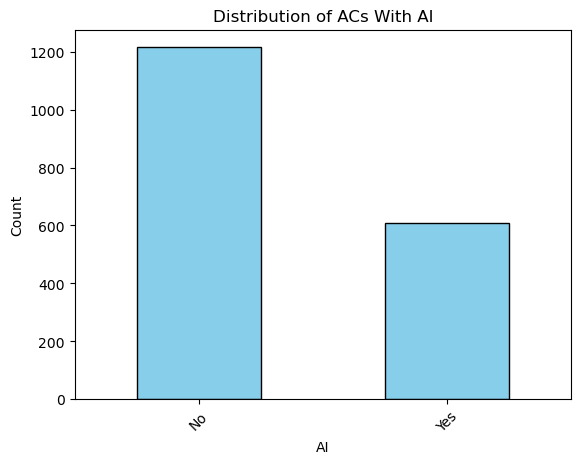

In [66]:
df["AI"].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of ACs With AI")
plt.xlabel("AI")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

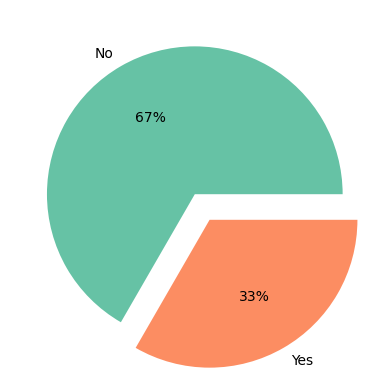

In [67]:
colours = sns.color_palette('Set2',8)
plt.pie(df['AI'].value_counts(),autopct = '%.0f%%',
       explode = [0,0.2],colors = colours,
       labels=df['AI'].value_counts().index)
plt.show()

# 2.Bivariate analysis

# C vs C
## 1.Count of Inverter and Non-Inverter ACs by Brand

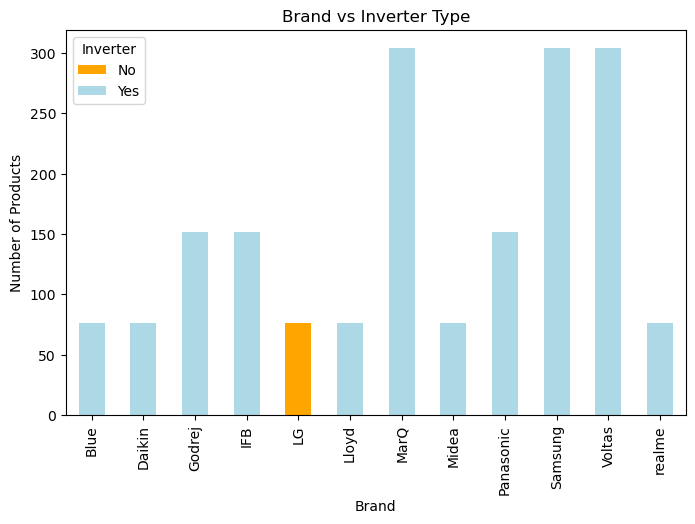

In [68]:
table = pd.crosstab(df["Brand"], df["Inverter"])

# Plot
table.plot(kind='bar', stacked=True, figsize=(8,5), color=["orange",'lightblue'])
plt.title("Brand vs Inverter Type")
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.legend(title="Inverter")
plt.show()

## 2.AC Models by Brand and Room Size

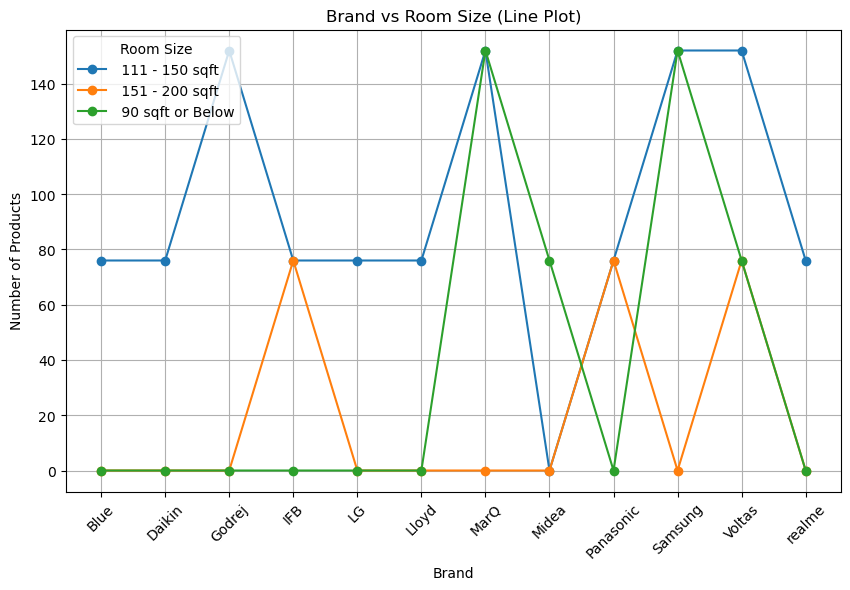

In [69]:
table = pd.crosstab(df["Brand"], df["Room size"])

# Line plot
plt.figure(figsize=(10,6))
for room_size in table.columns:
    plt.plot(table.index, table[room_size], marker='o', label=str(room_size))

plt.title("Brand vs Room Size (Line Plot)")
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.legend(title="Room Size")
plt.grid(True)
plt.show()

## 3.Count of AC Models per Brand by Price

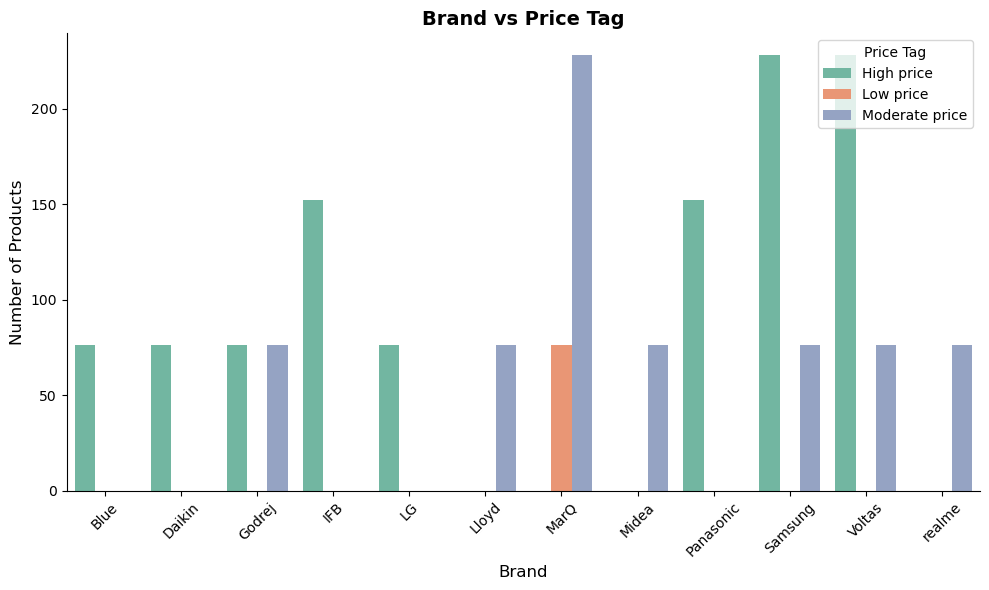

In [70]:
table = pd.crosstab(df["Brand"], df["Price tag"])

# Melt into long format for Seaborn
table_melted = table.reset_index().melt(
    id_vars="Brand", 
    var_name="Price tag", 
    value_name="Count"
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=table_melted,
    x="Brand",
    y="Count",
    hue="Price tag",
    palette="Set2"
)

# Styling
plt.title("Brand vs Price Tag", fontsize=14, weight="bold")
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Price Tag", loc="upper right")
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()


## 4.Count on Ac's with AI

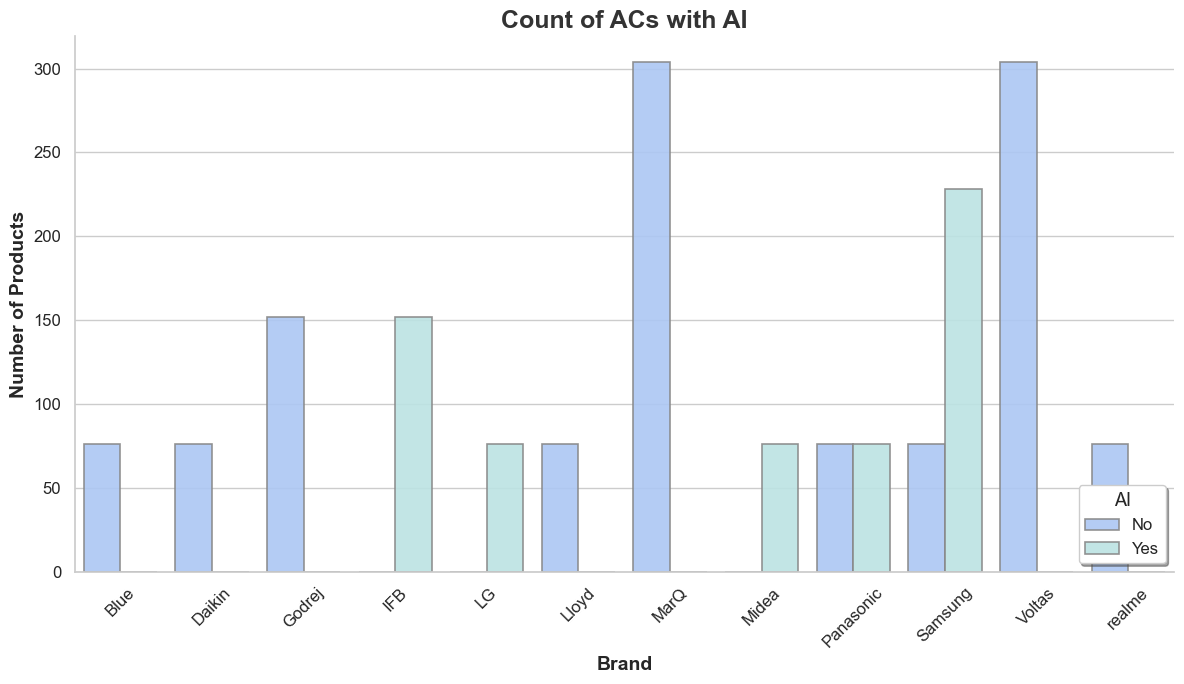

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crosstab and melt
table = pd.crosstab(df["Brand"], df["AI"])
table = table.reset_index().melt(id_vars="Brand", var_name="AI", value_name="Count")

plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

# Premium, modern pastel palette (cooler, neutral tones)
premium_palette = ["#A0C4FF", "#B5EAEA", "#FFC6FF", "#FFD6A5", "#CAFFBF", "#D0F4DE"]

# Barplot with premium colors
sns.barplot(
    data=table,
    x="Brand",
    y="Count",
    hue="AI",
    palette=premium_palette[:len(table['AI'].unique())],
    edgecolor="#888888",
    linewidth=1.2,
    alpha=0.9
)

# Styling
plt.title("Count of ACs with AI", fontsize=18, weight="bold", color="#333333")
plt.xlabel("Brand", fontsize=14, weight="bold")
plt.ylabel("Number of Products", fontsize=14, weight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="AI", loc="lower right", fontsize=12, title_fontsize=13, frameon=True, shadow=True)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()


# C vs N

## 1.Average price of each brand

C:\Users\mani9\AppData\Local\Temp\ipykernel_6956\1773940707.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


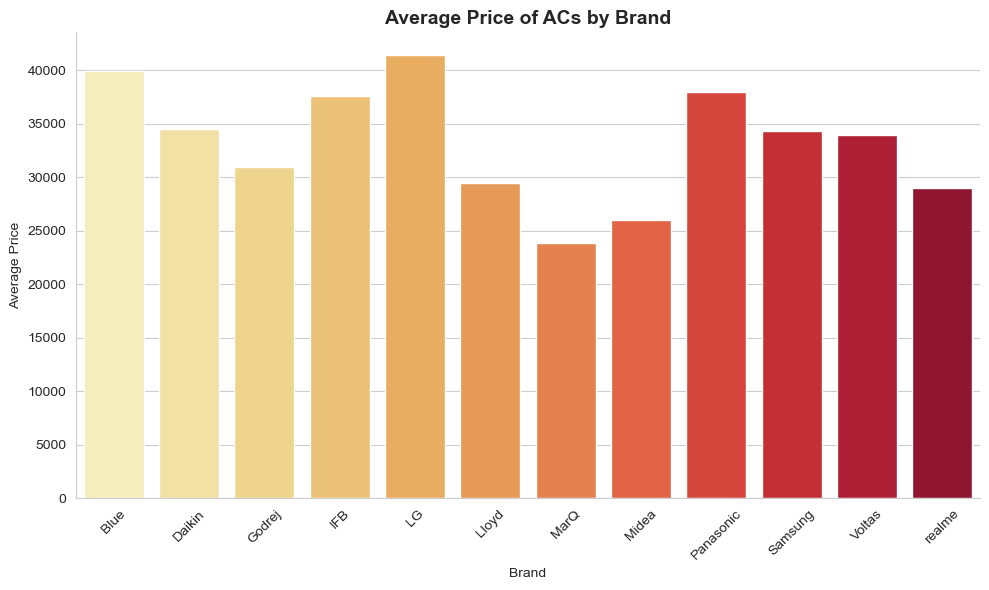

In [90]:
mean_price = df.groupby("Brand")["Price"].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=mean_price,
    x="Brand",
    y="Price",
    palette="YlOrRd"
)

plt.title("Average Price of ACs by Brand", fontsize=14, weight="bold")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

## 2.Average power usage per annualy for each brand

C:\Users\mani9\AppData\Local\Temp\ipykernel_13804\632835822.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Brand", y="Power usage per annualy", data=mean_power, palette="viridis")


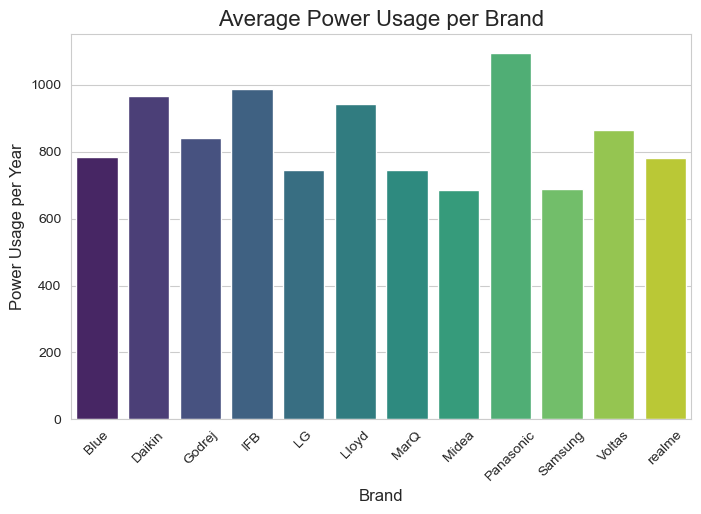

In [73]:
mean_power = df.groupby("Brand")["Power usage per annualy"].mean().reset_index()

# Seaborn bar plot
sns.set_style("whitegrid")  # cleaner background
plt.figure(figsize=(8,5))
sns.barplot(x="Brand", y="Power usage per annualy", data=mean_power, palette="viridis")
plt.title("Average Power Usage per Brand", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Power Usage per Year", fontsize=12)
plt.xticks(rotation=45)  # rotate brand names if long
plt.show()

## 3.Average power usage based on price tag

C:\Users\mani9\AppData\Local\Temp\ipykernel_13804\3651869825.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Price tag", x="Power usage per annualy", data=mean_power, palette="coolwarm")


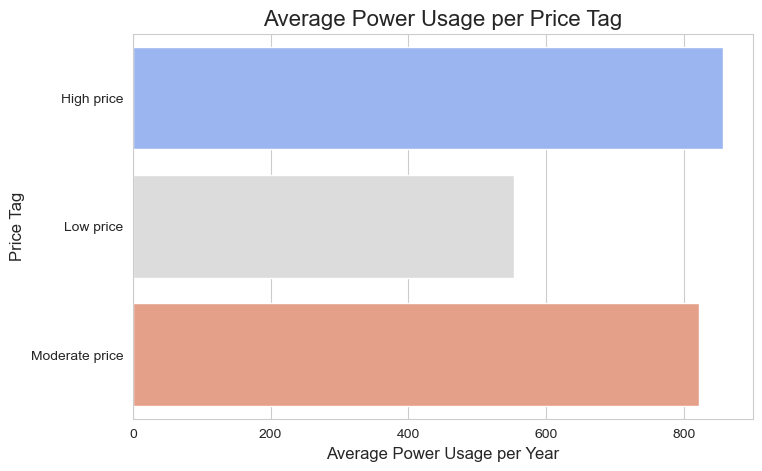

In [74]:
mean_power = df.groupby("Price tag")["Power usage per annualy"].mean().reset_index()

# Plot (horizontal bar plot)
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(y="Price tag", x="Power usage per annualy", data=mean_power, palette="coolwarm")

plt.title("Average Power Usage per Price Tag", fontsize=16)
plt.xlabel("Average Power Usage per Year", fontsize=12)
plt.ylabel("Price Tag", fontsize=12)
plt.show()

## 4.Average price based on stars

C:\Users\mani9\AppData\Local\Temp\ipykernel_13804\1638865940.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Star", x="Price", data=avg_price, palette="crest")


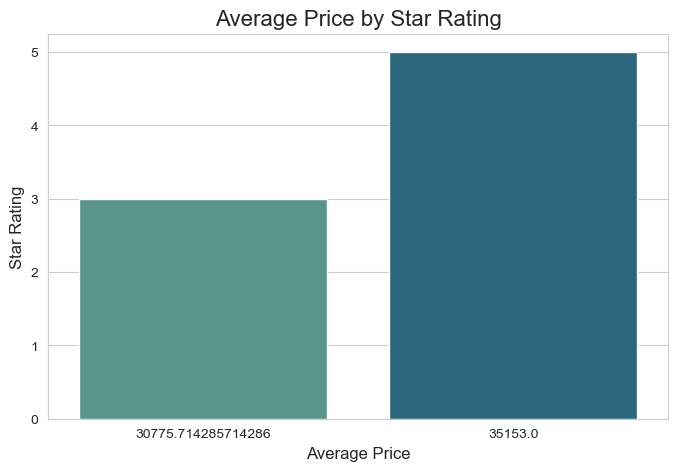

In [75]:
avg_price = df.groupby("Star")["Price"].mean().reset_index()

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(y="Star", x="Price", data=avg_price, palette="crest")

plt.title("Average Price by Star Rating", fontsize=16)
plt.xlabel("Average Price", fontsize=12)
plt.ylabel("Star Rating", fontsize=12)
plt.show()

## 5.Average power usage based on stars

C:\Users\mani9\AppData\Local\Temp\ipykernel_13804\2747461611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


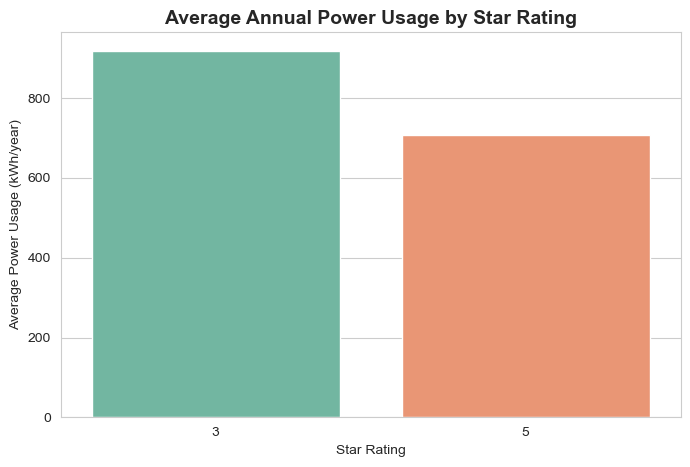

In [76]:
avg_power = df.groupby("Star")["Power usage per annualy"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    data=avg_power,
    x="Star",
    y="Power usage per annualy",
    palette="Set2"
)
plt.title("Average Annual Power Usage by Star Rating", fontsize=14, weight="bold")
plt.xlabel("Star Rating")
plt.ylabel("Average Power Usage (kWh/year)")
plt.show()

## 6.Average price if it inverter

C:\Users\mani9\AppData\Local\Temp\ipykernel_13804\2946273583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


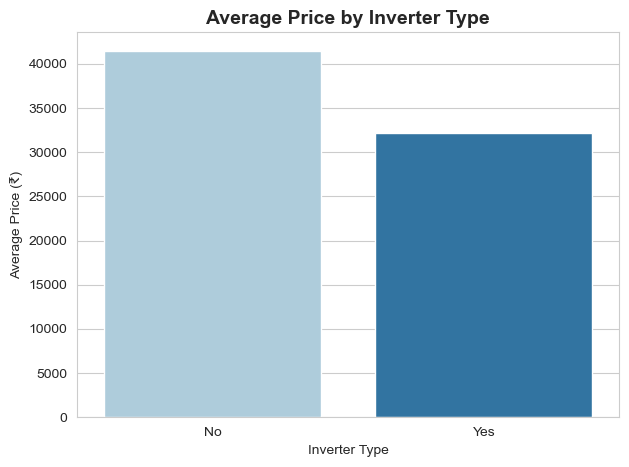

In [77]:
avg_price = df.groupby("Inverter")["Price"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(
    data=avg_price,
    x="Inverter",
    y="Price",
    palette="Paired"
)
plt.title("Average Price by Inverter Type", fontsize=14, weight="bold")
plt.xlabel("Inverter Type")
plt.ylabel("Average Price (₹)")
plt.show()

## 7.Room side based on average price

C:\Users\mani9\AppData\Local\Temp\ipykernel_6956\826614365.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




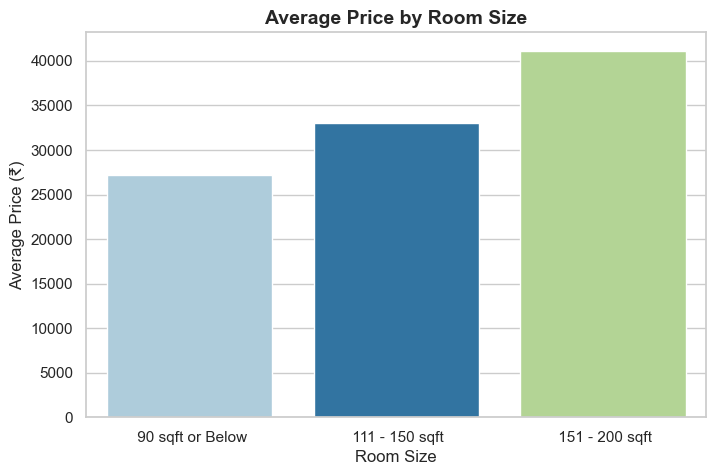

In [165]:
avg_price = df.groupby("Room size")["Price"].mean().reset_index()
avg_price = avg_price.sort_values(by="Price", ascending=True)
plt.figure(figsize=(8,5))
sns.barplot(
    data=avg_price,
    x="Room size",
    y="Price",
    palette="Paired"
)
plt.title("Average Price by Room Size", fontsize=14, weight="bold")
plt.xlabel("Room Size")
plt.ylabel("Average Price (₹)")
plt.show()

## 8.Average capcity of tons based on price tag

C:\Users\mani9\AppData\Local\Temp\ipykernel_13804\2416451870.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


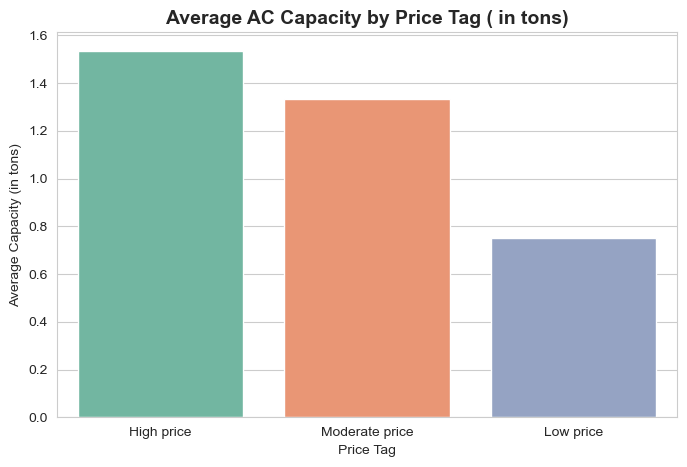

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate mean capacity per price tag
avg_capacity = df.groupby("Price tag")["Capacity in tons"].mean().reset_index()

# Step 2: Sort descending
avg_capacity = avg_capacity.sort_values(by="Capacity in tons", ascending=False)

# Step 3: Plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=avg_capacity,
    x="Price tag",
    y="Capacity in tons",
    palette="Set2"
)
plt.title("Average AC Capacity by Price Tag ( in tons)", fontsize=14, weight="bold")
plt.xlabel("Price Tag")
plt.ylabel("Average Capacity (in tons)")
plt.show()


## 9.Room size vs Capacity in tons

C:\Users\mani9\AppData\Local\Temp\ipykernel_13804\329812511.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


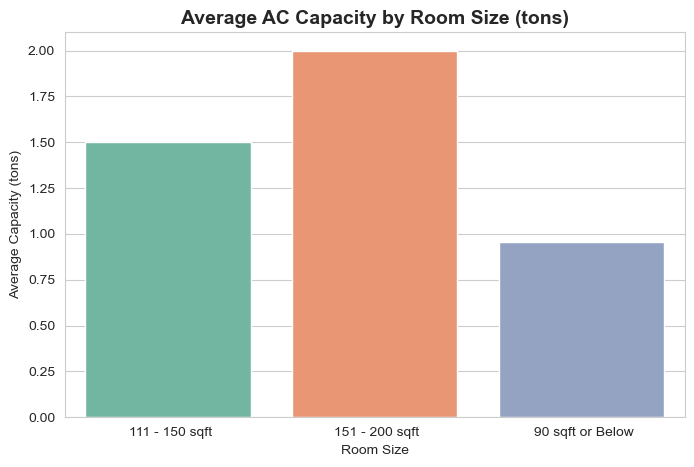

In [80]:
avg_capacity = df.groupby("Room size")["Capacity in tons"].mean().reset_index()


# Plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=avg_capacity,
    x="Room size",
    y="Capacity in tons",
    palette="Set2"
)
plt.title("Average AC Capacity by Room Size (tons)", fontsize=14, weight="bold")
plt.xlabel("Room Size")
plt.ylabel("Average Capacity (tons)")
plt.show()

## 10. Min, Max and average price of each brand

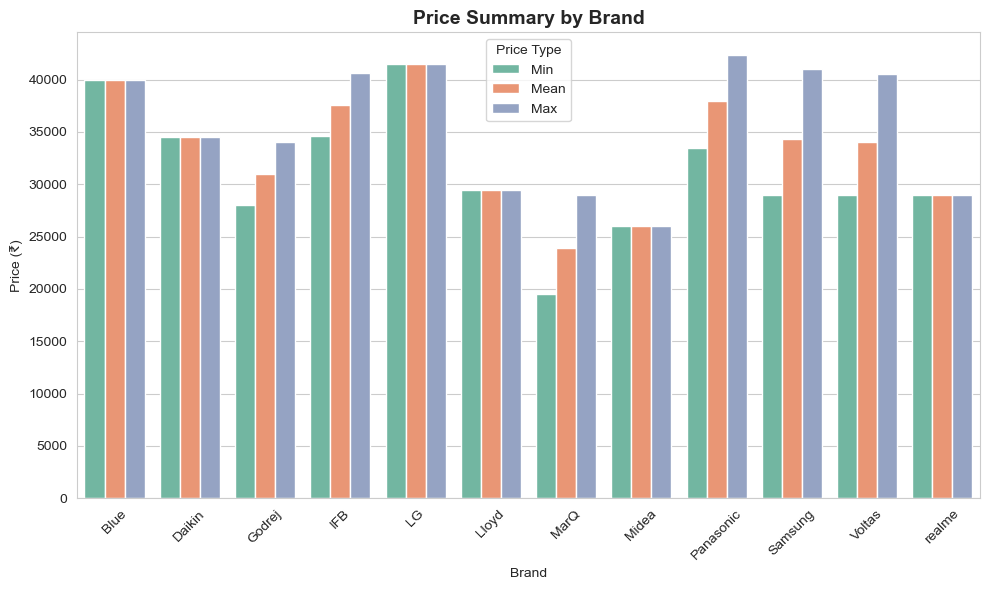

In [81]:
pivot = df.pivot_table(values='Price', index='Brand', aggfunc=['min','mean','max']).reset_index()
pivot.columns = ['Brand','Min','Mean','Max']  # Flatten columns

# Melt for Seaborn
pivot_melted = pivot.melt(id_vars='Brand', var_name='Price Type', value_name='Price')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=pivot_melted, x='Brand', y='Price', hue='Price Type', palette='Set2')

plt.title("Price Summary by Brand", fontsize=14, weight="bold")
plt.xlabel("Brand")
plt.ylabel("Price (₹)")
plt.xticks(rotation=45)
plt.legend(title="Price Type")
plt.tight_layout()
plt.show()

# N vs N

## Mean, Min and Max Ac capacity by model

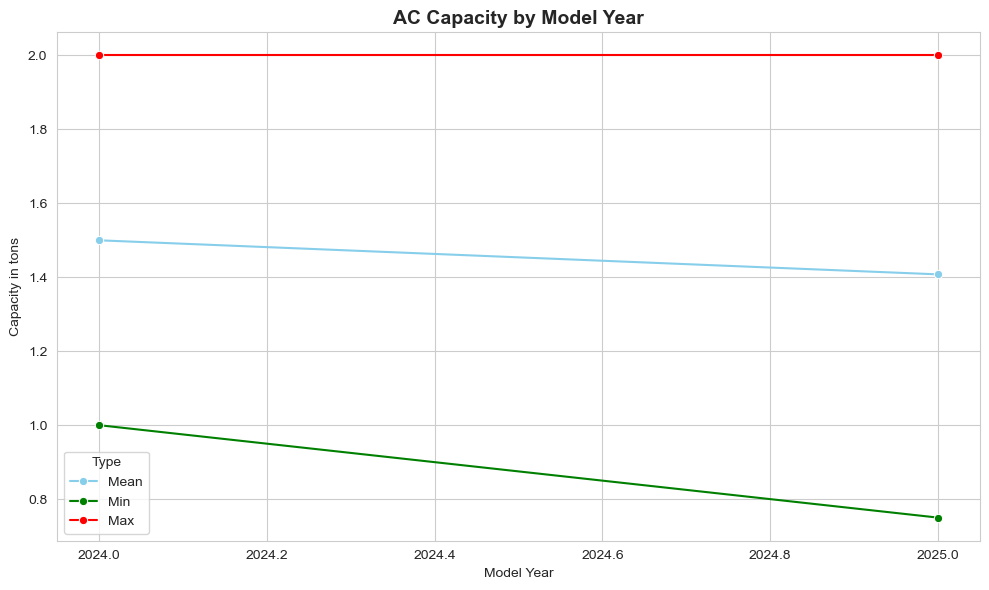

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table
pivot = df.pivot_table(values='Capacity in tons', index='Model', aggfunc=['mean','min','max']).reset_index()
pivot.columns = ['Model','Mean','Min','Max']

plt.figure(figsize=(10,6))
sns.lineplot(data=pivot, x='Model', y='Mean', marker='o', label='Mean', color='skyblue')
sns.lineplot(data=pivot, x='Model', y='Min', marker='o', label='Min', color='green')
sns.lineplot(data=pivot, x='Model', y='Max', marker='o', label='Max', color='red')

plt.title("AC Capacity by Model Year", fontsize=14, weight="bold")
plt.xlabel("Model Year")
plt.ylabel("Capacity in tons")
plt.legend(title="Type")
plt.grid(True)
plt.tight_layout()
plt.show()


## Mean, Min and Max Ac capacity by star rating

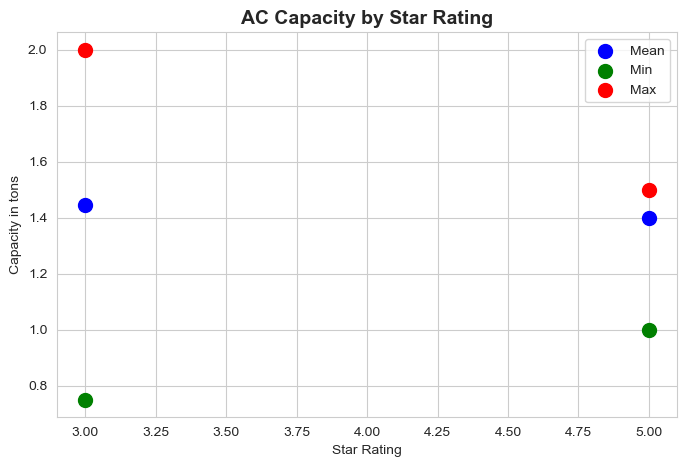

In [91]:
pivot = df.pivot_table(values='Capacity in tons', index='Star', aggfunc=['mean','min','max'])
pivot.columns = ['Mean Capacity', 'Min Capacity', 'Max Capacity']
pivot.reset_index(inplace=True)
plt.figure(figsize=(8,5))

plt.scatter(pivot['Star'], pivot['Mean Capacity'], color='blue', label='Mean', s=100)
plt.scatter(pivot['Star'], pivot['Min Capacity'], color='green', label='Min', s=100)
plt.scatter(pivot['Star'], pivot['Max Capacity'], color='red', label='Max', s=100)

plt.title("AC Capacity by Star Rating", fontsize=14, weight="bold")
plt.xlabel("Star Rating")
plt.ylabel("Capacity in tons")
plt.legend()
plt.show()

## Average power usage per annually based on star rating

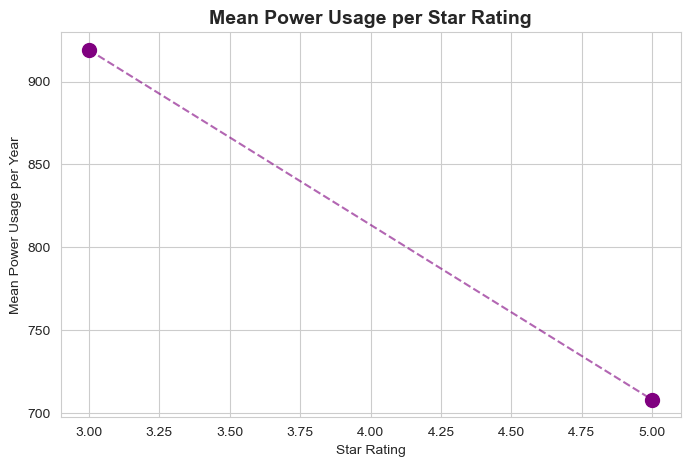

In [84]:
pivot_power = df.pivot_table(
    values='Power usage per annualy',
    index='Star',
    aggfunc='mean'  # mean only
)

# Optional: reset index for easier plotting
pivot_power.reset_index(inplace=True)
pivot_power.columns = ['Star', 'Mean Power Usage']
pivot_power
plt.figure(figsize=(8,5))
plt.scatter(pivot_power['Star'], pivot_power['Mean Power Usage'], color='purple', s=100)
plt.plot(pivot_power['Star'], pivot_power['Mean Power Usage'], color='purple', linestyle='--', alpha=0.6)

plt.title("Mean Power Usage per Star Rating", fontsize=14, fontweight='bold')
plt.xlabel("Star Rating")
plt.ylabel("Mean Power Usage per Year")
plt.grid(True)
plt.show()

# Multivariate analysis 

## Average price based on brand and model

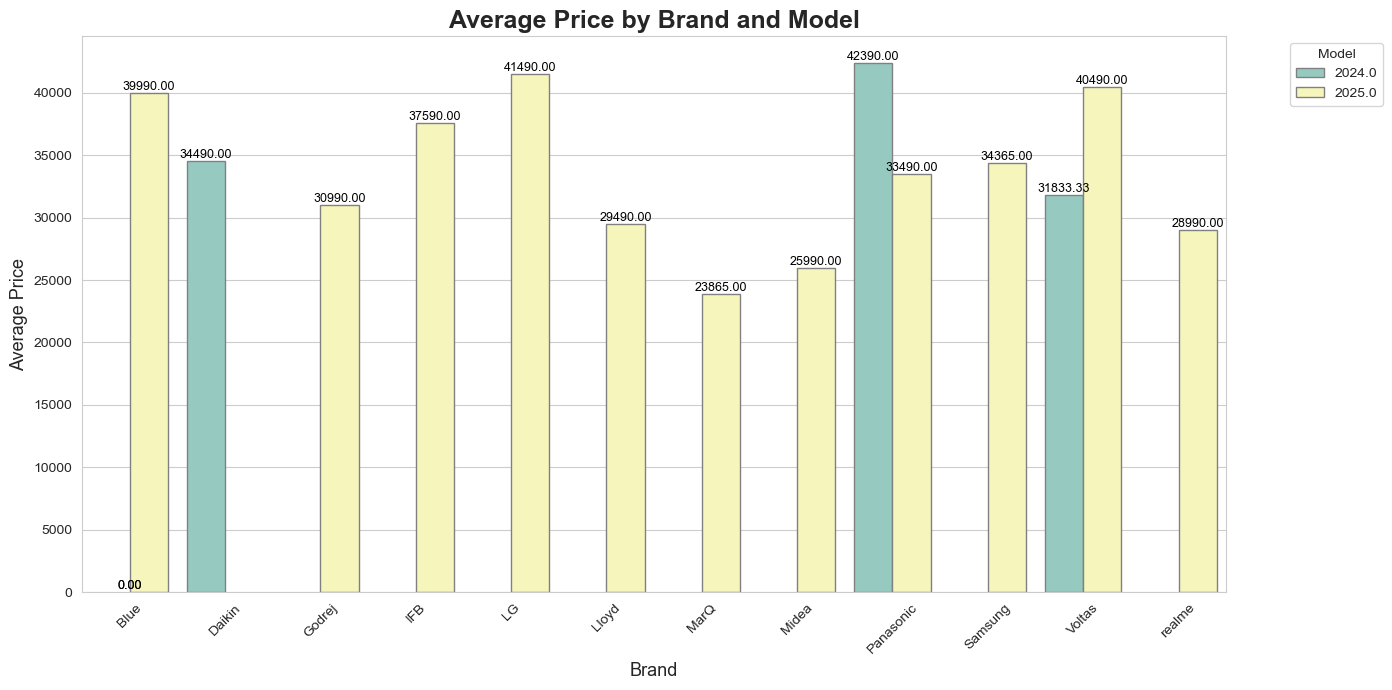

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table
pivot = df.pivot_table(values='Price', index='Brand', columns='Model', aggfunc='mean')

# Reset index to make 'Brand' a column
pivot.reset_index(inplace=True)

# Flatten columns, but keep 'Brand' intact
pivot.columns = ['Brand' if col=='Brand' else f"mean_{col}" for col in pivot.columns]

# Melt to long format
pivot_melted = pivot.melt(id_vars='Brand', var_name='Model', value_name='Price')
pivot_melted['Model'] = pivot_melted['Model'].str.replace('mean_', '')

# Seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))

# Bar plot
bar_plot = sns.barplot(
    data=pivot_melted,
    x='Brand',
    y='Price',
    hue='Model',
    palette='Set3',
    edgecolor='gray'
)

# Add data labels on top of bars
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.2f}', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='bottom', fontsize=9, color='black')

# Titles and labels
plt.title('Average Price by Brand and Model', fontsize=18, weight='bold')
plt.xlabel('Brand', fontsize=13)
plt.ylabel('Average Price', fontsize=13)
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Average power usage per annualy based on star rating and room size

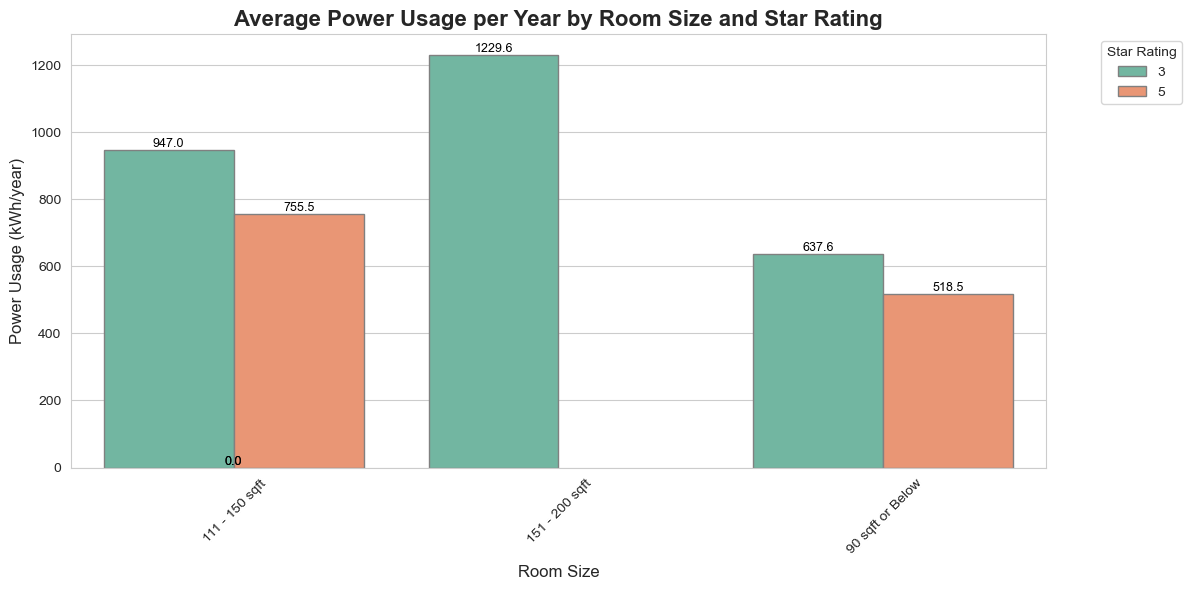

In [149]:
pivot = df.pivot_table(
    values='Power usage per annualy',
    index='Room size',
    columns='Star',
    aggfunc='mean'
)

pivot.reset_index(inplace=True)

pivot.columns = ['Room size' if col=='Room size' else f"mean_{col}" for col in pivot.columns]
pivot_melted = pivot.melt(id_vars='Room size', var_name='Star', value_name='Power usage')
pivot_melted['Star'] = pivot_melted['Star'].str.replace('mean_', '')
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

bar_plot = sns.barplot(
    data=pivot_melted,
    x='Room size',
    y='Power usage',
    hue='Star',
    palette='Set2',
    edgecolor='gray'
)

# Add value labels
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='bottom', fontsize=9, color='black')

plt.title('Average Power Usage per Year by Room Size and Star Rating', fontsize=16, weight='bold')
plt.xlabel('Room Size', fontsize=12)
plt.ylabel('Power Usage (kWh/year)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Star Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Average price based on Capacity and AI features

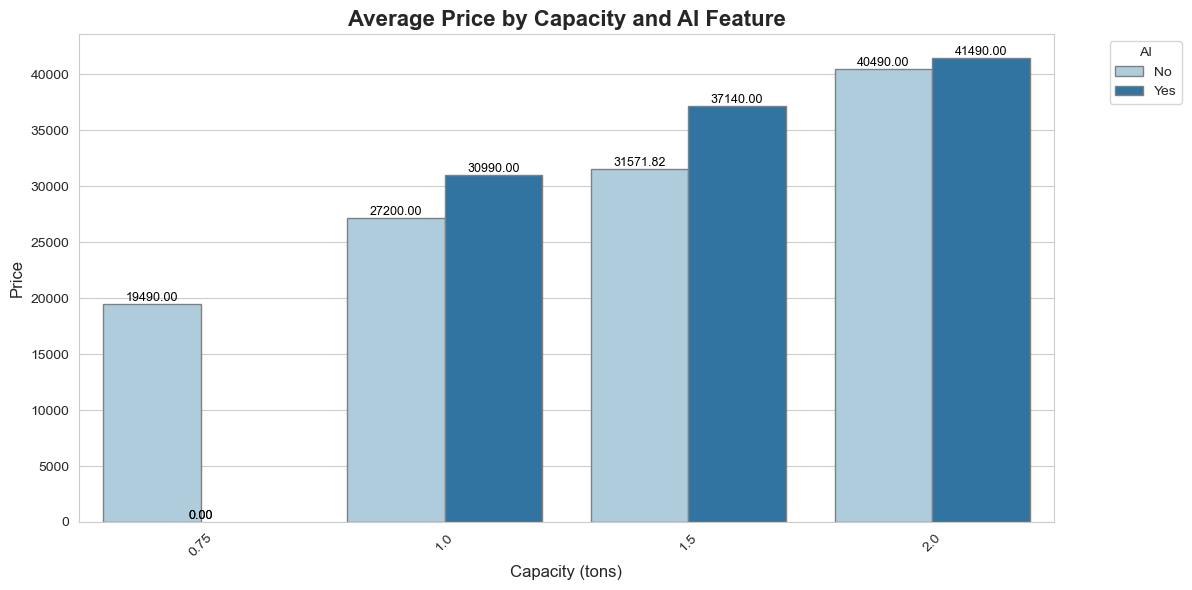

In [155]:
pivot = df.pivot_table(
    values='Price',
    index='Capacity in tons',
    columns='AI',
    aggfunc='mean'
)

# Reset index to make 'Capacity in tons' a column
pivot.reset_index(inplace=True)

# Flatten columns
pivot.columns = ['Capacity in tons' if col=='Capacity in tons' else f"mean_{col}" for col in pivot.columns]

pivot_melted = pivot.melt(id_vars='Capacity in tons', var_name='AI', value_name='Price')
pivot_melted['AI'] = pivot_melted['AI'].str.replace('mean_', '')
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

bar_plot = sns.barplot(
    data=pivot_melted,
    x='Capacity in tons',
    y='Price',
    hue='AI',
    palette='Paired',       # Soft and appealing colors
    edgecolor='gray'
)

# Add value labels
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.2f}', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='bottom', fontsize=9, color='black')

plt.title('Average Price by Capacity and AI Feature', fontsize=16, weight='bold')
plt.xlabel('Capacity (tons)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='AI', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



## 4.Average price by brand and star rating

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot = df.pivot_table(values='Price', index='Brand', columns='Star', aggfunc='mean').reset_index()
melted = pivot.melt(id_vars='Brand', var_name='Star', value_name='Average Price')

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

sns.barplot(
    data=melted,
    x='Brand',
    y='Average Price',
    hue='Star',
    palette='tab10',
    edgecolor='gray'
)

plt.title("Average Price by Brand and Star Rating", fontsize=16, weight="bold")
plt.xlabel("Brand", fontsize=13, weight="bold")
plt.ylabel("Average Price (₹)", fontsize=13, weight="bold")
plt.xticks(rotation=45)
plt.legend(title="Star Rating", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


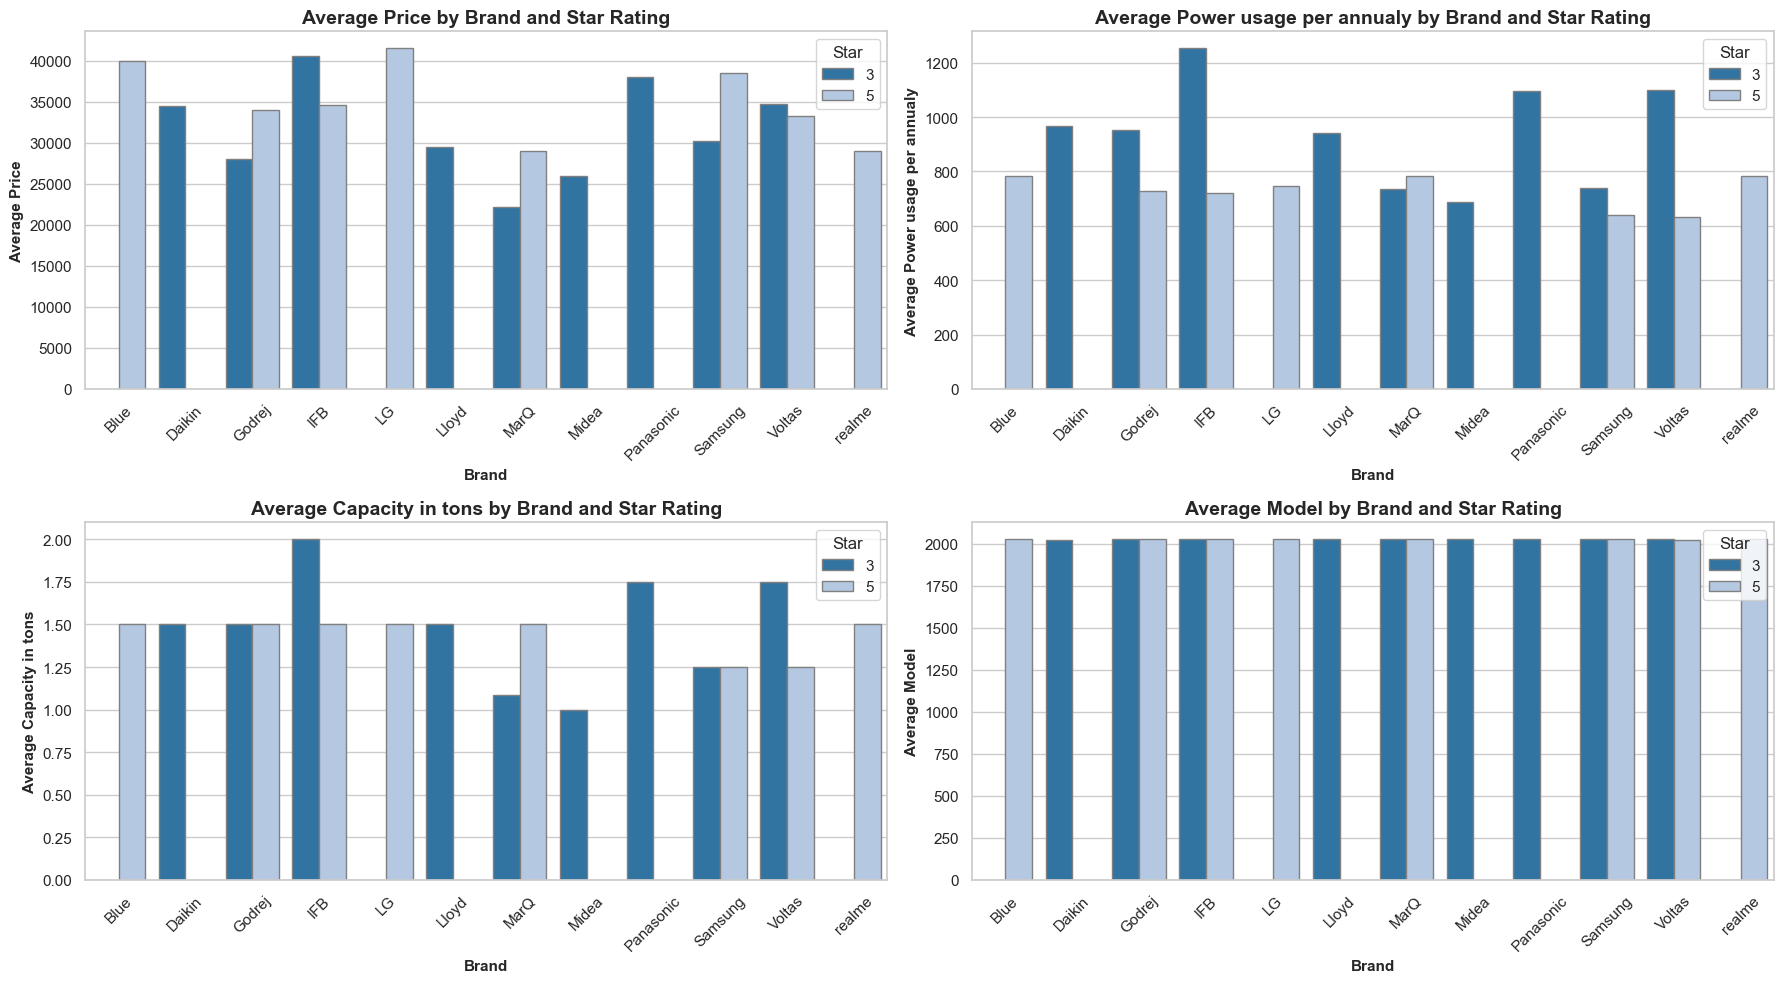

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of metrics to plot
metrics = ['Price', 'Power usage per annualy', 'Capacity in tons', 'Model']

# Set style
sns.set_style("whitegrid")

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

# Loop through each metric
for i, metric in enumerate(metrics):
    # Pivot table
    pivot = df.pivot_table(
        values=metric,
        index='Brand',
        columns='Star',
        aggfunc='mean'
    ).reset_index()

    # Melt for seaborn
    melted = pivot.melt(id_vars='Brand', var_name='Star', value_name=metric)

    # Plot on subplot
    sns.barplot(
        data=melted,
        x='Brand',
        y=metric,
        hue='Star',
        palette='tab20',
        edgecolor='gray',
        ax=axes[i]
    )

    # Title and labels
    axes[i].set_title(f"Average {metric} by Brand and Star Rating", fontsize=14, weight="bold")
    axes[i].set_xlabel("Brand", fontsize=11, weight="bold")
    axes[i].set_ylabel(f"Average {metric}", fontsize=11, weight="bold")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title="Star", loc='upper right')

plt.tight_layout()
plt.show()


# Conclusion :-
The analysis of the AC dataset provides key insights into pricing, power usage, capacity, and features across brands and star ratings. It highlights the relationship between features and cost, helping identify the most cost-effective and suitable ACs. Overall, this enables informed purchase decisions based on price, brand, and specifications.